In [36]:
import camelot as cm
import pandas as pd

#### The first part is to read, extract tables from some pdf file and save as csv file table

In [37]:
! ls

'Extracting Table from PDF-Report indicator Findex.ipynb'
 README.md
 report_indicator_findex.pdf
 table_from_pdf_excel.xlsx
 tabl_from_pdf.csv
 venv


In [38]:
#input_pdf=cm.read_pdf("https://globalfindex.worldbank.org/sites/globalfindex/files/2018-04/2017%20Findex%20full%20report_indicator%20table.pdf")

In [39]:
"stream", "lattice"

('stream', 'lattice')

In [40]:
input_pdf = cm.read_pdf("report_indicator_findex.pdf", flavor='stream',pages='1,2,3,4')

In [41]:
input_pdf

<TableList n=5>

In [42]:
for n in input_pdf:
    print(n)

<Table shape=(38, 4)>
<Table shape=(49, 4)>
<Table shape=(49, 4)>
<Table shape=(24, 4)>
<Table shape=(11, 4)>


In [43]:
input_pdf[2].df

,0,1,2,3
0,,,"Account ownership, 2017",
1,,Adults with an,Gap between men,Gap between richer
2,,account,and women,and poorer
3,Economy,(%),(percentage points)a,(percentage points)b
4,malawi,34,8,21
5,malaysia,85,5,8
6,mali,35,20,7
7,malta,97,—,4
8,mauritania,21,11,13
9,mauritius,90,6,6


In [44]:
df = input_pdf[2].df.loc[11:14,0:4]

In [45]:
df

,0,1,2,3
11,moldova,44,—,20
12,mongolia,93,–4,4
13,montenegro,68,—,13
14,morocco,29,25,16


In [46]:
df = df.reset_index(drop = True)

In [47]:
df

,0,1,2,3
0,moldova,44,—,20
1,mongolia,93,–4,4
2,montenegro,68,—,13
3,morocco,29,25,16


In [48]:
df.columns = ["Country","Adults","Gap Men Women","Gap Poor Richer"]

In [49]:
df

,Country,Adults,Gap Men Women,Gap Poor Richer
0,moldova,44,—,20
1,mongolia,93,–4,4
2,montenegro,68,—,13
3,morocco,29,25,16


In [98]:
df.to_csv("table_from_pdf.csv",index=False)

In [99]:
!ls

'Extracting Table from PDF-Report indicator Findex.ipynb'   table_from_pdf.csv
 README.md						    venv
 report_indicator_findex.pdf


In [100]:
df.to_excel("table_from_pdf_excel.xlsx")

In [101]:
!ls

'Extracting Table from PDF-Report indicator Findex.ipynb'
 README.md
 report_indicator_findex.pdf
 table_from_pdf.csv
 table_from_pdf_excel.xlsx
 venv


#### The second part

In [102]:
df2 = pd.read_csv("table_from_pdf.csv")
df2

,Country,Adults,Gap Men Women,Gap Poor Richer
0,moldova,44,—,20
1,mongolia,93,–4,4
2,montenegro,68,—,13
3,morocco,29,25,16


In [118]:
import numpy as np

In [119]:
#df2[cols_to_check] = df2[cols_to_check].replace({';': ''}, regex=True)
#print(df2)
df2 = df2.replace({'–4': '-4'}, regex=True)
df2 = df2.replace({'—': '0'}, regex=True)

df2

,Country,Adults,Gap Men Women,Gap Poor Richer
0,moldova,44,0,20
1,mongolia,93,-4,4
2,montenegro,68,0,13
3,morocco,29,25,16


In [128]:
df2[["Adults", "Gap Men Women","Gap Poor Richer"]] = df2[["Adults", "Gap Men Women","Gap Poor Richer"]].apply(pd.to_numeric)
df2

,Country,Adults,Gap Men Women,Gap Poor Richer
0,moldova,44,0,20
1,mongolia,93,-4,4
2,montenegro,68,0,13
3,morocco,29,25,16


In [129]:
import seaborn as sns

In [130]:
df2_melted = df2.melt('Country', var_name='Gaps', value_name='percentage')

In [131]:
df2_melted

,Country,Gaps,percentage
0,moldova,Adults,44
1,mongolia,Adults,93
2,montenegro,Adults,68
3,morocco,Adults,29
4,moldova,Gap Men Women,0
5,mongolia,Gap Men Women,-4
6,montenegro,Gap Men Women,0
7,morocco,Gap Men Women,25
8,moldova,Gap Poor Richer,20
9,mongolia,Gap Poor Richer,4


<AxesSubplot:xlabel='Country', ylabel='percentage'>

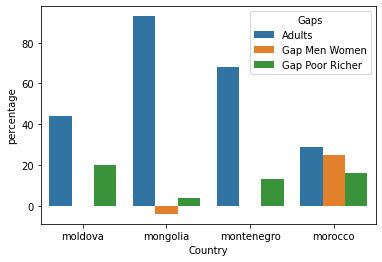

In [133]:
sns.barplot(x = "Country", y = "percentage", hue = "Gaps", data = df2_melted)